In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("Housing.csv")
#print(df.head())
# 1. Show me exactly what columns you have
print(df.columns.tolist())

# 2. Show me the first 5 rows so we can see the real names
df.head()

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [39]:
X = df[['area','bedrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y = df['price']

In [40]:

print(df.dtypes)
X = df.select_dtypes(include=['number'])
X = X.drop('price', axis=1, errors='ignore')
y = df['price']

print("Using these numeric features:", X.columns.tolist())



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
Using these numeric features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']


LinearRegression()

In [41]:
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

MSE: 2292721545725.36
MAE: 1127483.35


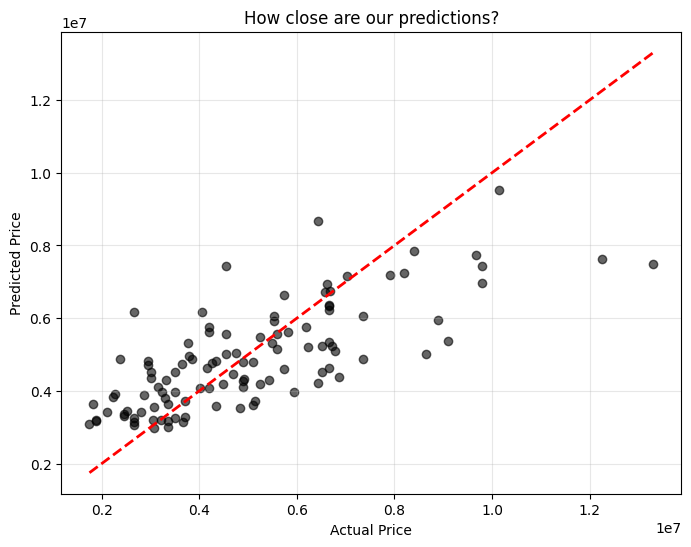

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="black", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("How close are our predictions?")
plt.grid(True, alpha=0.3)
plt.show()